<a href="https://colab.research.google.com/github/rajeev-chaudhary/Data-Engineering-projects/blob/main/Supertore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub pandas matplotlib seaborn scikit-learn --quiet

import kagglehub, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


Superstore Sales Analytics (Business Insights)

In [7]:
import pandas as pd
import kagglehub

# Download dataset
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
print("Path:", path)

# Try safe encoding
file_path = path + "/Sample - Superstore.csv"

# Option 1: latin1 (most common fix)
df = pd.read_csv(file_path, encoding='latin1')

# Option 2: fallback (UTF-8 with error ignore)
# df = pd.read_csv(file_path, encoding='utf-8', errors='ignore')

print(df.head())


Using Colab cache for faster access to the 'superstore-dataset-final' dataset.
Path: /kaggle/input/superstore-dataset-final
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United S

🧠 Tasks

Data cleaning (handle missing values)

Add Profit Margin = Profit / Sales

Group by Category, Region, Year

Visuals:

Sales by Region (bar)

Profit by Category (bar)

Discount vs Profit (scatter)

Monthly sales trend (line)

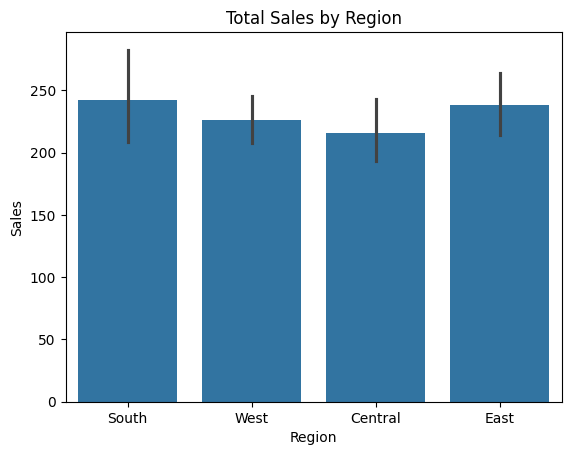

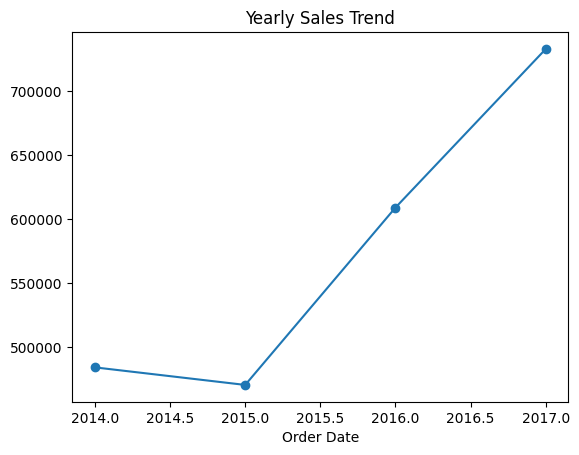

In [8]:
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Total Sales by Region')
plt.show()

df['Order Date'] = pd.to_datetime(df['Order Date'])
df.groupby(df['Order Date'].dt.year)['Sales'].sum().plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.show()


🧹 STEP 1 – Data Cleaning & Feature Engineering

In [9]:
# Clean columns
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Convert date
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Create new features
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month_name()
df['Profit_Margin'] = (df['Profit'] / df['Sales']).round(2)

# Basic summary
df.describe(include='all').T.head(10)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Row_ID,9994.0,NaN,NaN,NaN,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order_ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_Date,9994,NaN,NaN,NaN,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship_Date,9994,NaN,NaN,NaN,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Ship_Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📊 STEP 2 – Regional & Category Performance

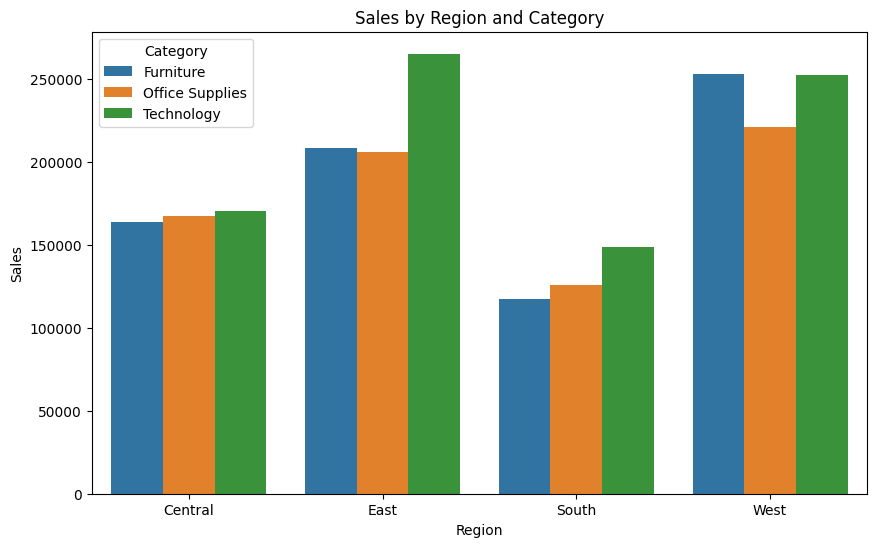

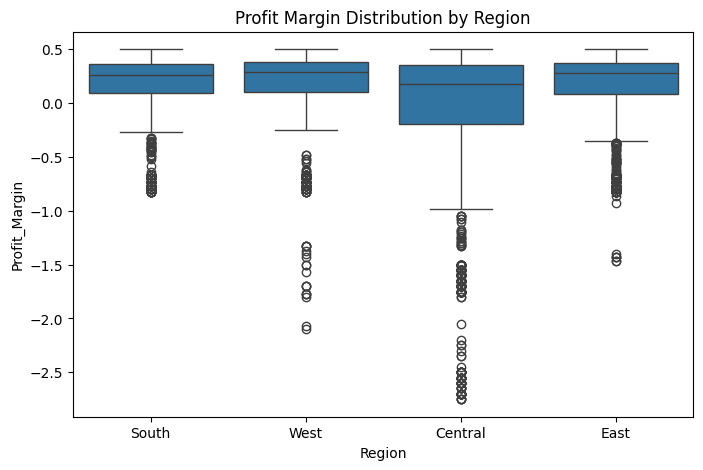

In [10]:
# 1️⃣ Sales by Region and Category
pivot_region = df.groupby(['Region', 'Category'])[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', hue='Category', data=pivot_region)
plt.title("Sales by Region and Category")
plt.show()

# 2️⃣ Profit Margin by Region
plt.figure(figsize=(8,5))
sns.boxplot(x='Region', y='Profit_Margin', data=df)
plt.title("Profit Margin Distribution by Region")
plt.show()


📈 STEP 3 – Time-Series Sales Trend (Yearly + Monthly)

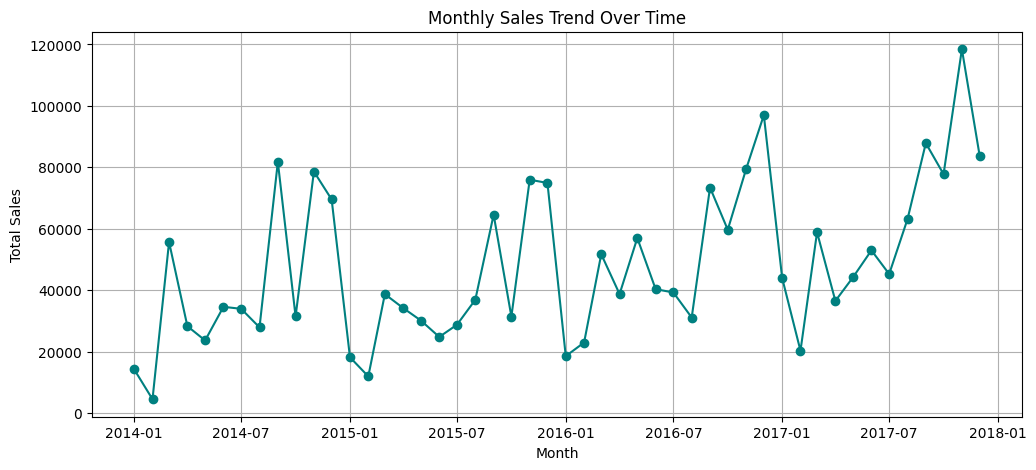

In [11]:
# Group monthly sales
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal')
plt.title("Monthly Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


💰 STEP 4 – Top Products & Customers (Pareto 80/20 Analysis)

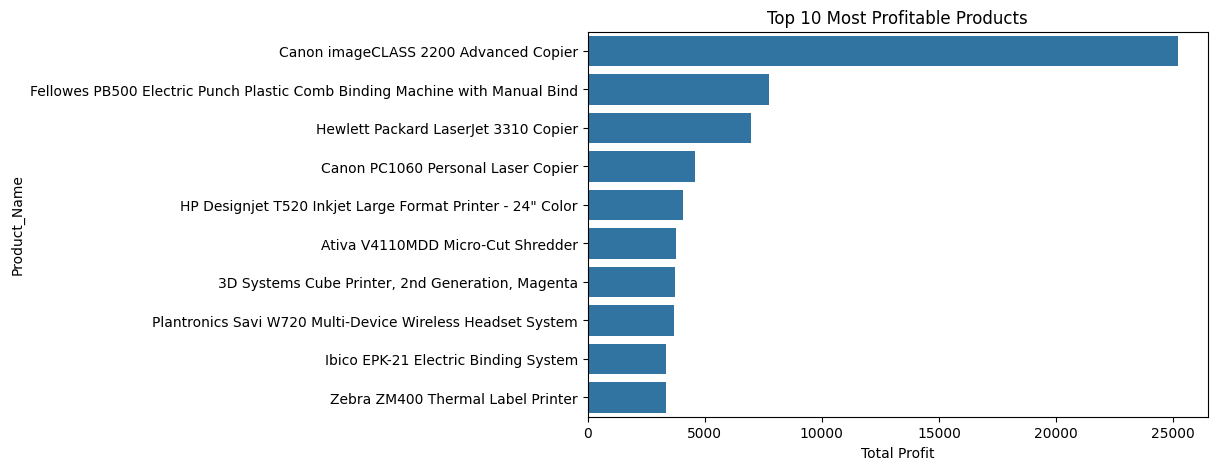

Top 20% customers contribute:  81.43 % of profit


In [12]:
# Top 10 products by profit
top_products = df.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit")
plt.show()

# Customer-level contribution
customer_profit = df.groupby('Customer_Name')['Profit'].sum().sort_values(ascending=False)
top_20_percent = customer_profit.head(int(0.2*len(customer_profit)))
print("Top 20% customers contribute: ", round(top_20_percent.sum()/customer_profit.sum()*100,2), "% of profit")


🧩 STEP 5 – Correlation Heatmap

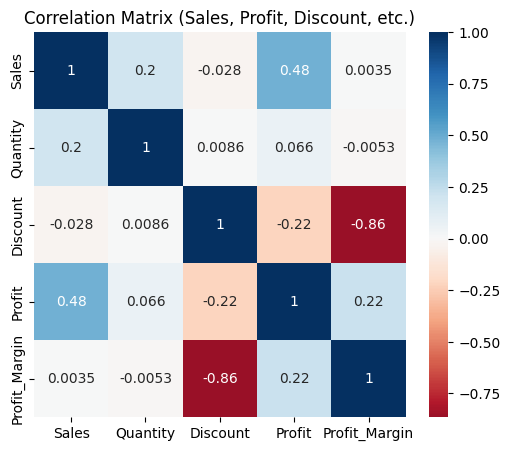

In [13]:
corr = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Profit_Margin']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="RdBu", center=0)
plt.title("Correlation Matrix (Sales, Profit, Discount, etc.)")
plt.show()


🔮 STEP 6 – Advanced Add-On: Profit Forecast (Quick Demo)

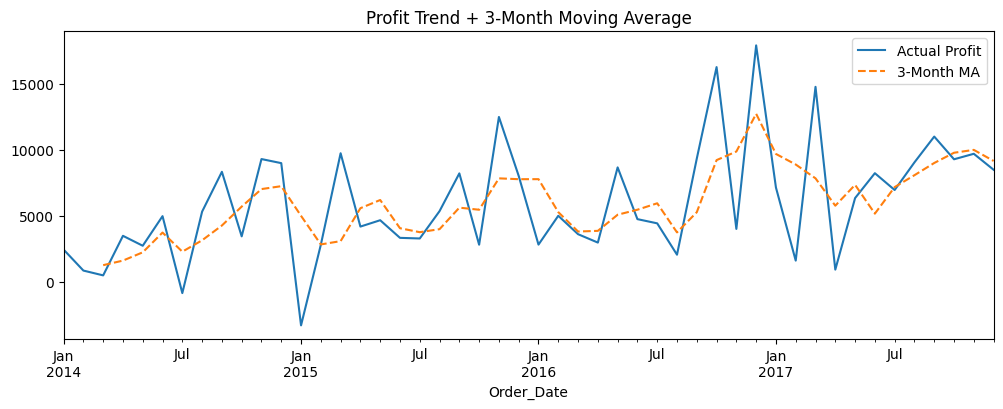

In [15]:
# Aggregate monthly profit
monthly_profit = df.groupby(df['Order_Date'].dt.to_period('M'))['Profit'].sum().to_timestamp()

# Simple moving average forecast
monthly_profit.plot(figsize=(12,4), label="Actual Profit")
monthly_profit.rolling(3).mean().plot(label="3-Month MA", linestyle='--')
plt.title("Profit Trend + 3-Month Moving Average")
plt.legend()
plt.show()
